In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("Fraud.csv")

In [6]:
df.shape

(6362620, 11)

In [7]:
df.head(100) #first 100 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


#### Data Analysis

In [8]:
df.isnull().values.any() # To check missing values
#False -> No missing value in our dataframe

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
correct= len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
correct_percent = (correct / (fraud + correct)) * 100
fraud_percent = (fraud / (fraud + correct)) * 100

print("Number of Correct transactions: ", correct)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Correct transactions: {:.5f} %".format(correct_percent)) # prints the percentage of correct transactions with five decimal places.
print("Percentage of Fraud transactions: {:.5f} %".format(fraud_percent))# prints the percentage of fraud transactions with five decimal places.

Number of Correct transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Correct transactions: 99.87092 %
Percentage of Fraud transactions: 0.12908 %


Class imbalance with a large majority of correct transactions and a small percentage of fraud transactions, it's important to choose a classification model that can handle imbalanced datasets effectively. 

#### Visualization of Dataset

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

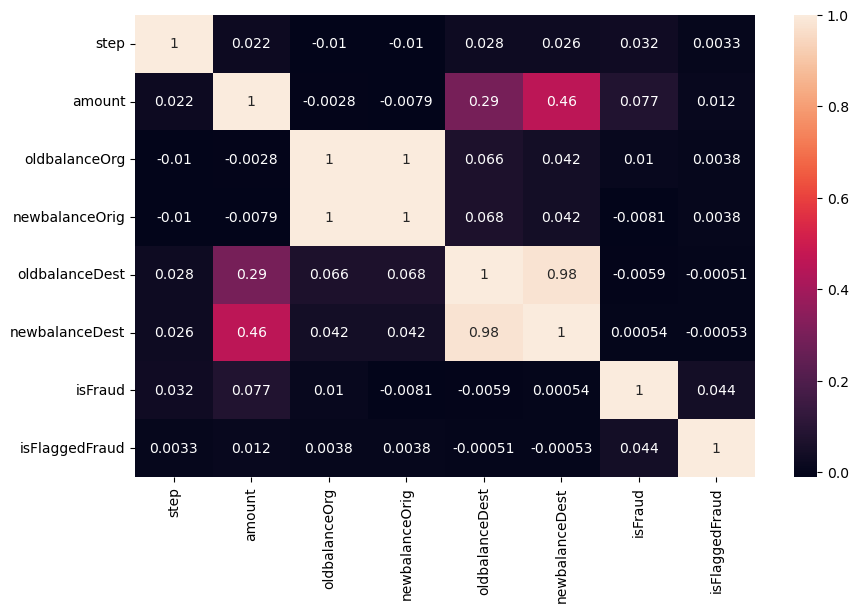

In [12]:
numeric_df = df.select_dtypes(include=['number']) # DataFrame that includes only the numeric columns
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

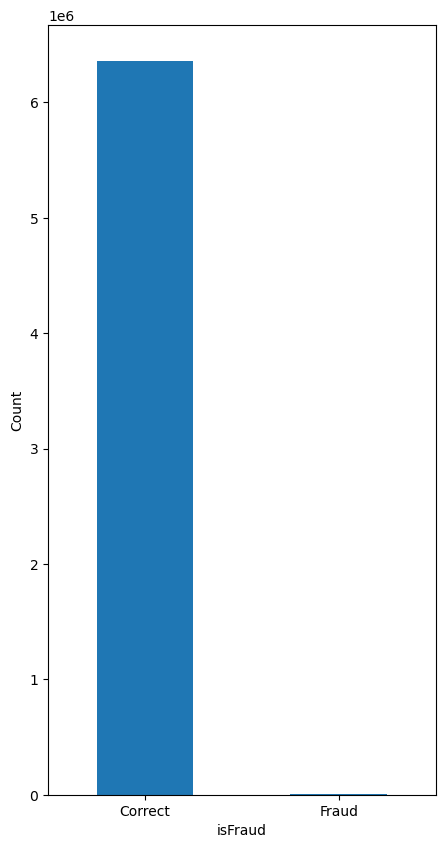

In [13]:
plt.figure(figsize=(5,10))
labels = ["Correct", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [14]:
new_df=df.copy()
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))
print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


#### Dealing with Multicollinearity
Multicollinearity can arise from various sources, including the way data is collected, redundant variables, or even mathematical transformations of variables.
Multicollinearity is characterized by a high correlation (positive or negative) between two or more independent variables in a regression model.


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()  # Initializes an empty DataFrame 
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


#### Interpretation
oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest are also highly correlated.

In [17]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

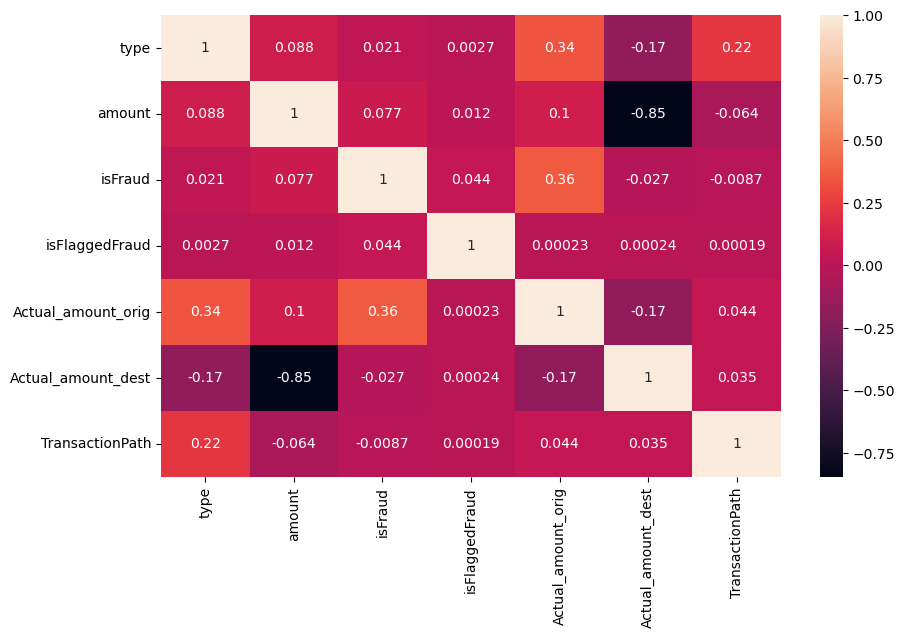

In [18]:
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#### Model Selection
Random Forest model, it is an ensemble learning method that can handle imbalanced data well.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)
''' These preprocessing steps are typically performed to ensure that the data is in the 
right format and scale for machine learning algorithm.'''

In [21]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
'''The training set (X_train and Y_train) is used to train the machine learning model, 
while the testing set (X_test and Y_test) is used to evaluate the model's performance.'''

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [22]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95861243743406


In [23]:
print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Random Forest
True Positives: 1711
False Positives: 66
True Negatives: 1906285
False Negatives: 724


In [24]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



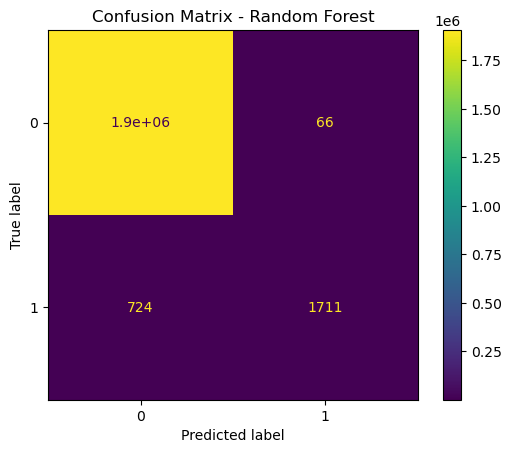

In [26]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Conclusion

What are the key factors that predict fraudulent customer?

- Unusual Transaction Patterns
- Account Activity
- Historical Data

Do these factors make sense? If yes, How? If not, How not?

Yes, the factors mentioned generally make sense when it comes to predicting fraudulent customer behavior in a financial context. 

- Unusual Transaction Patterns: 
Fraudsters often conduct a large number of transactions in a short time or make transactions that deviate significantly from normal customer behavior. Identifying such unusual patterns can help in flagging potential fraud.
- Account Activity: 
Frequent changes in account information or multiple failed login attempts could indicate attempts to gain unauthorized access or take control of an account.
- Historical Data: 
Past fraud or suspicious activity associated with a customer is a strong indicator that they might engage in fraudulent behavior again.

What kind of prevention should be adopted while company update its infrastructure?

- Real-Time Transaction Monitoring
- Machine Learning and AI
- Customer Verification

Assuming these actions have been implemented, how would you determine if they work?

To determinie the effectiveness of the fraud prevention measures we can follow these steps:
- Bank sending E-statements.
- Customers keeping a check of their account activity.
- Always keep a log of your payments.